In [7]:
import pandas as pd
import json
import gspread
from dotenv import dotenv_values

In [8]:
credentials = json.loads(dotenv_values()["SERVICE_ACCOUNT"])
service_account = gspread.service_account_from_dict(credentials)
sheets = service_account.open("Ils sont venus à l'urbanlab")
worksheet_2018 = sheets.worksheet("2018")
wks_dict_2018 = worksheet_2018.get_all_values()

In [10]:
df = pd.DataFrame(
    wks_dict_2018[2:],
    columns = wks_dict_2018[1]
)

In [161]:
col_interest = [
    "Date",
    "Nombre",
    
]

df = df[col_interest]
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = pd.

In [162]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df["Nombre"].tail(10)

53     5
54    16
55     6
56    20
57     7
58     3
59    60
60    20
61     6
62     4
Name: Nombre, dtype: object

In [12]:
new_df = pd.DataFrame()
for index, line in df.iterrows():
    for i in range(int(line["Nombre"])):
        new_df = new_df.append(pd.DataFrame({
            "Nombre": [1],
            "Date": [line["Date"]],
            "year": 2018
        }))
new_df.reset_index(drop=True, inplace=True)
new_df["Date"] = new_df.apply(
    axis=1,
    func=lambda x: x["Date"].replace(year=2018)
)

ValueError: invalid literal for int() with base 10: ''

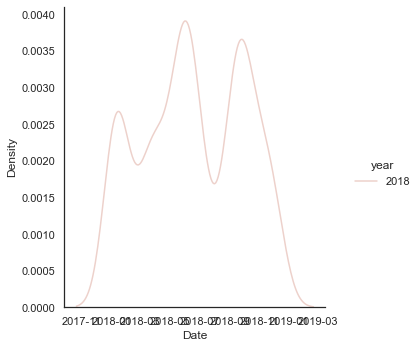

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

sns.displot(
    data=new_df,
    x="Date",
    kind='kde',
    hue='year'
)

In [1]:
new_df

NameError: name 'new_df' is not defined

# process things

In [23]:
import pandas as pd

df = pd.read_csv("processed_data.csv")
df["Date"] = pd.to_datetime(df["Date"])

<AxesSubplot:xlabel='Date', ylabel='Count'>

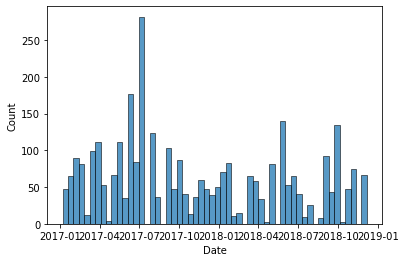

In [34]:
import seaborn as sns
import numpy as np


sns.histplot(data=df["Date"], stat="count", bins=int(np.sqrt(df.shape[0])))

In [33]:
np.sqrt(df.shape[0])


56.74504383644443

# tracé d'un histogramme avec trop de variables tracées

<AxesSubplot:xlabel='distance', ylabel='Count'>

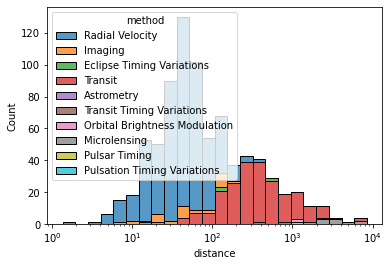

In [31]:
import seaborn as sns
import pandas as pd

planets = sns.load_dataset("planets")
sns.histplot(data=planets, x='distance', log_scale=True, hue="method", multiple='stack')

<AxesSubplot:xlabel='distance', ylabel='Count'>

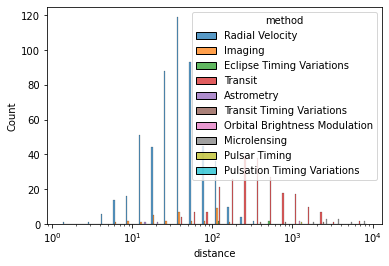

In [34]:
import seaborn as sns
import pandas as pd

planets = sns.load_dataset("planets")
sns.histplot(data=planets, x='distance', log_scale=True, hue="method", multiple='dodge')

# tracé d'un catplot

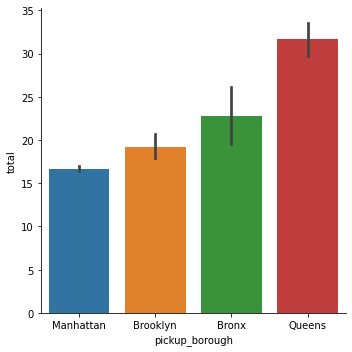

In [16]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("flights")
g = sns.catplot(
    data=df,
    kind='bar',
    x='pickup_borough',
    y='total',
    order=[
        "Manhattan",
        "Brooklyn",
        "Bronx",
        "Queens"
    ]
)

In [13]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
